In [1]:
import sys
sys.path.append('../Codes/library/')
from functions import*
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams['text.usetex'] = True
Text_files_path = '/Users/robertomorantovar/Dropbox/Research/Evolution_Immune_System/Text_files/'

%autosave 60

Autosaving every 60 seconds


In [36]:
data = pd.read_excel(Text_files_path + 'Data/Victora_2016/aad3439-databases1.xlsx', header=1, sheet_name = 'Photoactivation')

/Users/robertomorantovar/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


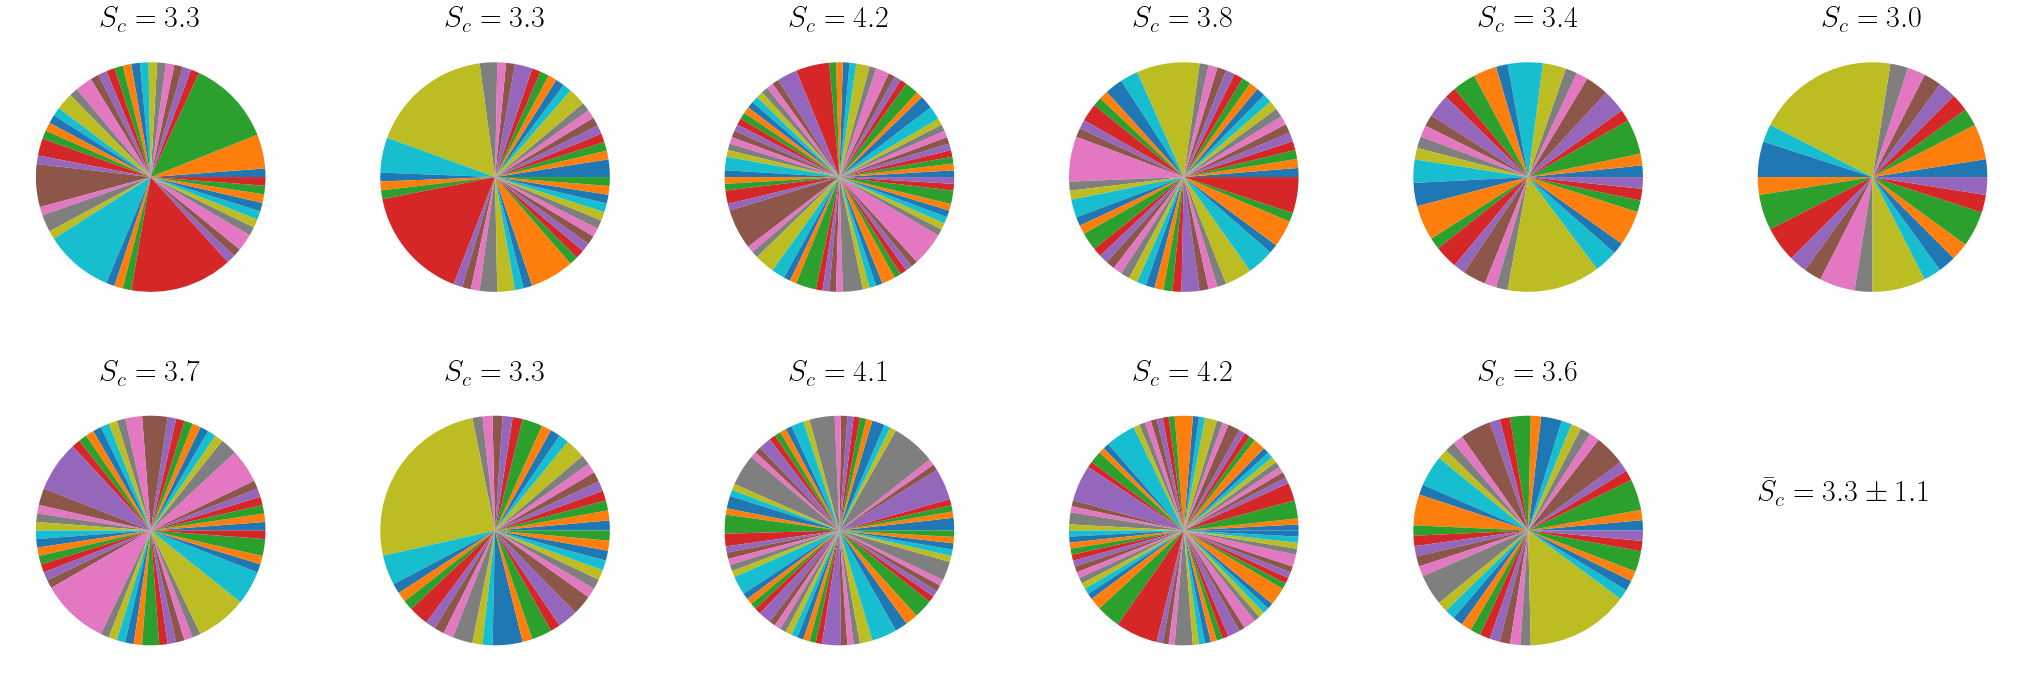

In [37]:
data_early = data.loc[data['Figures']=='2/S3']
lns = np.arange(1, 7)
gcs = np.arange(1, 3)
fig, ax = plt.subplots(2, 6, figsize = (30, 10), gridspec_kw={'left':0.02, 'right':.95, 'bottom':.05, 'top': 0.95}, edgecolor = 'black')
S = []
for i, ln in enumerate(lns):
    #print(str(ln))
    data_ln = data_early.loc[data_early['LN']==ln]
    for j, gc in enumerate(gcs):
        #print(str(gc))
        data_gc = data_ln.loc[data_ln['GC']==gc]
        CDR3, counts = np.unique(np.array((list(data_gc['CDR3:']))), return_counts = True)
        N = np.sum(counts)
        S_i = -np.sum((counts/N)*np.log((counts/N)))
        S.append(S_i)
        if S_i != 0:
            ax[j, i].pie(counts)
            ax[j, i].set_title(r'$S_c=%.1f$'%(S_i), fontsize = 30)
        else:
            ax[j, i].axis('off')
            ax[j, i].text(x = .1, y = .6, s = r'$\bar S_c = %.1f \pm %.1f$'%(np.mean(S), np.sqrt(np.var(S))), fontsize = 30)
fig.savefig('../Figures/11_Victora_2016/clonal_entropy.pdf')

(array([1., 0., 3., 1., 1., 0., 2., 0., 0., 3.]),
 array([2.98265107, 3.10474245, 3.22683383, 3.34892522, 3.4710166 ,
        3.59310798, 3.71519936, 3.83729075, 3.95938213, 4.08147351,
        4.20356489]),
 <BarContainer object of 10 artists>)

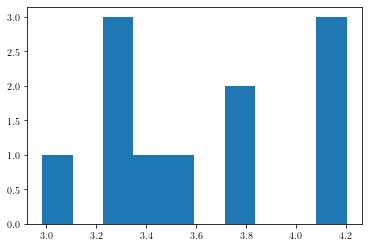

In [38]:
S = S[:-1]
fig, ax = plt.subplots(figsize = (6, 4))
ax.hist(S)

-0.6381053396586985 0.013842875072049534


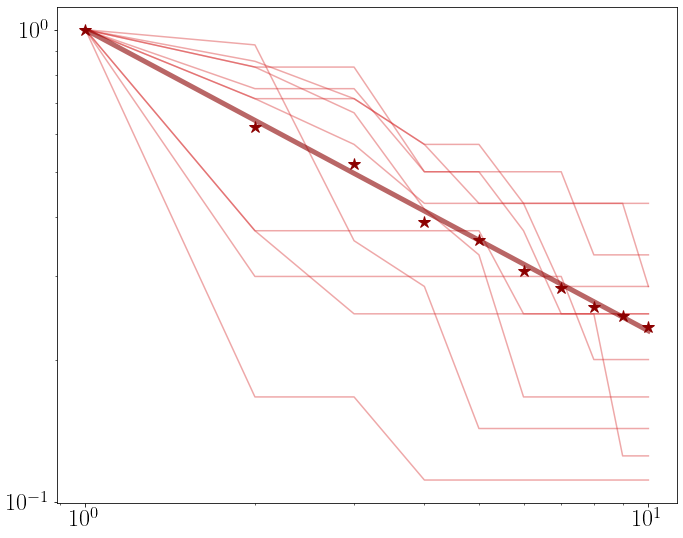

In [54]:
data_early = data.loc[data['Figures']=='2/S3']
lns = np.arange(1, 7)
gcs = np.arange(1, 3)
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.12, 'right':.98, 'bottom':.1, 'top': 0.96})
S = []
max_rank = 10
counts_per_ranking = np.zeros(max_rank)
x_avg = np.zeros(max_rank)
for i, ln in enumerate(lns):
    #print(str(ln))
    data_ln = data_early.loc[data_early['LN']==ln]
    for j, gc in enumerate(gcs):
        #print(str(gc))
        data_gc = data_ln.loc[data_ln['GC']==gc]
        CDR3, counts = np.unique(np.array((list(data_gc['CDR3:']))), return_counts = True)
        if(np.sum(counts)>0):
            sort_index = counts.argsort()
            largest = np.array(counts)[sort_index][-1]
            x = np.flip(counts[sort_index])[:max_rank]/largest
            for k in range(max_rank):
                if(x[k]>0):
                    counts_per_ranking[k]+=1
                    x_avg[k]+=x[k]
            ax.plot(range(1,max_rank+1), x, color = 'tab:red', alpha = .4)
            
x_avg/=counts_per_ranking
ax.plot(range(1,max_rank+1), x_avg, lw = 2, marker = '*', ls = '', color = 'darkred', ms = 12)

popt, pcov = curve_fit(my_linear_func, np.log(range(1,max_rank+1)), np.log(x_avg))

ax.plot(range(1,max_rank+1), range(1,max_rank+1)**(popt[1]), lw = 5, marker = '', ls = '-', color = 'darkred', alpha = .6)

print(popt[1], np.sqrt(pcov[1,1]))
my_plot_layout(ax =ax, yscale = 'log', xscale = 'log')
fig.savefig('../Figures/11_Victora_2016/ranking.pdf')


In [55]:
data_early

,Sequence ID,Figures,LN,GC,Antigen,V,J,D,AA JUNCTION,# Mutations,V-Gene (VBASE2):,CDR3:,# Mutations.1,SEQ,Light chain,Comments
607,PATP7A01IgM,2/S3,1,1,CGG,HV1-53*01,HJ4*01,HD3-3*01,CARRGKNYYAMDYW,0,musIGHV329,ARRGKNYYAMDY,0.0,GGGACTGAACTGGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,NaN,NaN
608,PATP7A02IgG,2/S3,1,1,CGG,HV1-50*01,HJ4*01,HD1-1*02,CARGGYYAMDYW,0,musIGHV326,ARGGYYAMDY,0.0,GGGGCTGAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,NaN,NaN
609,PATP7A03IgM,2/S3,1,1,CGG,HV1-81*01,HJ2*01,HD3-1*01,CARDGAYFDYW,0,musIGHV363,ARDGAYFDY,0.0,GGAGCTGAGCTGGCGAGGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,NaN,NaN
610,PATP7A04IgM,2/S3,1,1,CGG,HV1-53*01,HJ2*01,HD1-2*01,CARDDGYW,0,musIGHV329,ARDDGY,0.0,GGGACTGAACTGGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,NaN,NaN
611,PATP7A05IgM,2/S3,1,1,CGG,HV1-69*01,HJ3*01,HD3-2*02,CARDSSGPRFAYW,1,musIGHV353,ARDSSGPRFAY,1.0,GGGGCTGAGCTTGTGATGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,D6N0519P5D07IgM,2/S3,6,1,NP-OVA,HV1-72*01,HJ4*01,HD5-7*01,CARREPLYYAMDYW,1,musIGHV057,ARREPLYYAMDY,1.0,GGGGCTGAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,lambda,NaN
1508,D6N0519P5D08IgM,2/S3,6,1,NP-OVA,HV1-72*01,HJ4*01,HD1-1*01,CARYYGSGYYAMDYW,3,musIGHV057,ARYYGSGYYAMDY,3.0,GGGACTGAACTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,lambda,NaN
1509,D6N0519P5D09IgM,2/S3,6,1,NP-OVA,HV1-64*01,HJ3*01,HD3-2*02,CARRWAAQATPFAYW,2,musIGHV346,ARRWAAQATPFAY,2.0,GGGGCTGAGCTGGTAAAGCCTGGGGCTTCAGTGAAGTTGTCCTGCA...,lambda,NaN
1510,D6N0519P5D10IgM,2/S3,6,1,NP-OVA,HV1-72*01,HJ4*01,HD2-1*01,CARYYYGILYAMDYW,2,musIGHV057,ARYYYGILYAMDY,2.0,GGGGCTGAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCA...,lambda,NaN


In [27]:
np.random.randint(0, 2)

1